In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from collections import OrderedDict


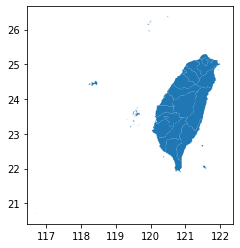

In [2]:
fp = "gadm36_TWN.gpkg"
map_df = gpd.read_file(fp)
map_df.plot()

In [3]:
df_2020 = pd.read_excel("2020/total.xls")

In [4]:
df_2020 = df_2020.drop([0, 1 , 2, 3]).reset_index(drop=True).drop([df_2020.columns[5],df_2020.columns[6],
                                                    df_2020.columns[7],df_2020.columns[8],df_2020.columns[9],df_2020.columns[10],df_2020.columns[11]],
                                                       axis='columns')
df_2020.columns = ['City', 'PFP', 'KMT', 'DPP', 'Total']
df_2020

,City,PFP,KMT,DPP,Total
0,總 計,"608,590","5,522,119","8,170,231","14,300,940"
1,臺北市,"70,769","685,830","875,854","1,632,453"
2,新北市,"112,620","959,631","1,393,936","2,466,187"
3,桃園市,"63,132","529,749","718,260","1,311,141"
4,臺中市,"84,800","646,366","967,304","1,698,470"
5,臺南市,"41,075","339,702","786,471","1,167,248"
6,高雄市,"55,309","610,896","1,097,621","1,763,826"
7,新竹縣,"18,435","154,224","152,380","325,039"
8,苗栗縣,"15,222","164,345","147,034","326,601"
9,彰化縣,"35,060","291,835","436,336","763,231"


In [5]:
match = []
diff_2020 = []
diff_map = []
for name in df_2020.City:
    for city in map_df.NL_NAME_2:
        if city == name.strip() and (city not in match):
            match.append(city)
    diff_2020.append(name)
for city in map_df.NL_NAME_2:
    if city not in match:
        diff_map.append(city)

In [6]:
df_2020.at[1, 'City'] = '台北市'
df_2020.at[22, 'City'] = '馬祖列島'
df_2020.at[5, 'City'] = '台南'
df_2020.at[16, 'City'] = '台東縣'
df_2020.at[4, 'City'] = '台中'

In [7]:
df_2020['City'] = [city.strip() for city in df_2020['City']]

In [8]:
df_2020.head()

,City,PFP,KMT,DPP,Total
0,總 計,"608,590","5,522,119","8,170,231","14,300,940"
1,台北市,"70,769","685,830","875,854","1,632,453"
2,新北市,"112,620","959,631","1,393,936","2,466,187"
3,桃園市,"63,132","529,749","718,260","1,311,141"
4,台中,"84,800","646,366","967,304","1,698,470"


In [9]:
map_df['NL_NAME_2'].head()

0     金門縣
1    馬祖列島
2     高雄市
3     新北市
4      台中
Name: NL_NAME_2, dtype: object

In [10]:
map_df = map_df.rename(columns={'NL_NAME_2':'City'})

In [11]:
df_outer = pd.merge(map_df, df_2020, on='City', how='outer')

In [12]:
df_outer

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,City,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,PFP,KMT,DPP,Total
0,TWN,Taiwan,TWN.1_1,Fujian,福建,TWN.1.1_1,Kinmen,Jīnmén Xiàn,金門縣,Xiàn,County,None,TW.FK.KM,"MULTIPOLYGON (((118.39986 24.43569, 118.39792 ...","1,636","35,948","10,456","48,040"
1,TWN,Taiwan,TWN.1_1,Fujian,福建,TWN.1.2_1,Lienkiang,Mǎzǔ Lièdǎo|Matsu Islands,馬祖列島,Xiàn,County,None,TW.FK.LK,"MULTIPOLYGON (((120.08598 26.38403, 120.08598 ...",188,"4,776","1,226","6,190"
2,TWN,Taiwan,TWN.2_1,Kaohsiung,高雄,TWN.2.1_1,Kaohsiung,Gāoxióng Shì,高雄市,Zhíxiáshì,Special Municipality,None,TW.KH.KS,"MULTIPOLYGON (((120.33264 22.55320, 120.33264 ...","55,309","610,896","1,097,621","1,763,826"
3,TWN,Taiwan,TWN.3_1,New Taipei,新北,TWN.3.1_1,New Taipei,Xīnběi Shì,新北市,Zhíxiáshì,Special Municipality,None,TW.NT.TP,"MULTIPOLYGON (((122.07875 25.63431, 122.07875 ...","112,620","959,631","1,393,936","2,466,187"
4,TWN,Taiwan,TWN.4_1,Taichung,台中,TWN.4.1_1,Taichung,Taichung City,台中,Zhíxiáshì,Special Municipality,None,TW.TG.TU,"MULTIPOLYGON (((120.50069 24.26875, 120.50069 ...","84,800","646,366","967,304","1,698,470"
5,TWN,Taiwan,TWN.5_1,Tainan,台南,TWN.5.1_1,Tainan,Tainan City,台南,Zhíxiáshì,Special Municipality,None,TW.TN.TI,"MULTIPOLYGON (((120.13875 22.99792, 120.13736 ...","41,075","339,702","786,471","1,167,248"
6,TWN,Taiwan,TWN.6_1,Taipei,台北,TWN.6.1_1,Taipei,Táiběi Shì,台北市,Zhíxiáshì,Special Municipality,None,TW.TP.TC,"MULTIPOLYGON (((121.41348 25.16764, 121.41348 ...","70,769","685,830","875,854","1,632,453"
7,TWN,Taiwan,TWN.7_1,Taiwan,台灣,TWN.7.1_1,Changhua,Zhānghuà Xiàn,彰化縣,Xiàn,County,None,TW.TA.CG,"MULTIPOLYGON (((120.30180 23.90319, 120.30209 ...","35,060","291,835","436,336","763,231"
8,TWN,Taiwan,TWN.7_1,Taiwan,台灣,TWN.7.2_1,Chiayi City,Jiāyì Shì,嘉義市,Shì,Provincial City,None,TW.TA.CS,"MULTIPOLYGON (((120.42706 23.50177, 120.43077 ...","6,204","56,269","99,265","161,738"
9,TWN,Taiwan,TWN.7_1,Taiwan,台灣,TWN.7.3_1,Chiayi County,Jiāyì Xiàn,嘉義縣,Xiàn,County,None,TW.TA.CH,"MULTIPOLYGON (((120.12930 23.35375, 120.12930 ...","11,138","98,810","197,342","307,290"


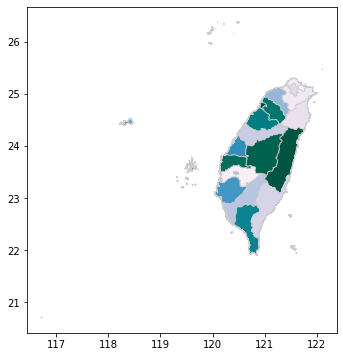

In [13]:
variable = 'KMT'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create ma
df_outer.plot(column=variable, cmap='PuBuGn_r',linewidth=0.8,ax=ax, edgecolor='0.8')

In [14]:
parties = {'KMT': 'Blues',
               'DPP': 'Greens'}

In [15]:
winning_party = []
for index, row in df_outer.iterrows():
    if row['KMT'] >row['DPP']:
        print(row['KMT'])
        winning_party.append('KMT')
    else:
        winning_party.append('DPP')

35,948
4,776
610,896
959,631
98,810
154,224
99,360
164,345
67,413
90,010


In [16]:
df_outer['winning_party'] = winning_party

In [17]:
total = []
for index, row in df_outer.iterrows():
    total.append(row['KMT'] + row['DPP'] + row['PFP'])
df_outer['Total'] = total

In [18]:
margin = []
for index, row in df_outer.iterrows():
    if row['winning_party'] == 'KMT':
        print(row['KMT'], row['Total'])
        margin.append(row['KMT'] / row['Total'])
    else:
         margin.append(row['DPP'] / row['Total'])

35,948 35,94810,4561,636


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
print(margin, winning_party, df_outer['City'])

In [ ]:
df_outer['margin'] = margin

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(15, 5))
divider = make_axes_locatable(ax)

for party, color in parties.items():

    cax = divider.append_axes('right', size='2%', pad=0.6)
    cax.set_xlabel(party)

    df_outer[df_outer.winning_party == party].plot(column='margin', cmap=color,
                                         legend=True, ax=ax, cax=cax)